<a href="https://colab.research.google.com/github/niciamcompi/bias-classifier/blob/main/Runner_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import pandas as pd

# Paths to the CSV files
csv_file_path1 = '/content/drive/MyDrive/lz100_ergebnisse_2023.csv'
csv_file_path2 = '/content/drive/MyDrive/lz100_ergebnisse_2023_höhe.xlsx'

# Load the CSV files into Pandas DataFrames
data_csv = pd.read_csv(csv_file_path1, sep=';')
data_xlsx = pd.read_excel(csv_file_path2)

# Rename the columns to have a consistent name
data_xlsx.rename(columns={'Name': 'NAME'}, inplace=True)

# Print the first few rows of each DataFrame
print("First DataFrame:")
print(data_csv.head())

print("\nSecond DataFrame:")
print(data_xlsx.head())

# Merge the DataFrames by the common variable name
merged_data = pd.merge(data_csv, data_xlsx, on='NAME')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
First DataFrame:
    SEX  BIB                NAME    STATION    KM  TIME_DAY
0  MALE   94       Reik Leiterer  Albishorn  18.5  0.076389
1  MALE    1       Pascal Rüeger  Albishorn  18.5  0.079618
2  MALE   85    Henrik Westerlin  Albishorn  18.5  0.079769
3  MALE   57  Francesco Piovesan  Albishorn  18.5  0.081088
4  MALE   81   Johannes Stimpfle  Albishorn  18.5  0.081250

Second DataFrame:
   Rang (Overall)  Rang Girls  Rang Boys  Startnummer                NAME  \
0             1.0         NaN        1.0           85    Henrik Westerlin   
1             2.0         NaN        2.0            1       Pascal Rüeger   
2             3.0         NaN        3.0           47  Matthias Dippacher   
3             4.0         1.0        NaN           99        Luzia Bühler   
4             5.0         NaN        4.0           81   Johannes Stimpfle   

  Albishorn 

Modelle Speed

In [2]:
import pandas as pd

df = pd.DataFrame(merged_data)

# Calculate speed (KM per day)
df['SPEED'] = df['KM'] / (df['TIME_DAY'] * 24)
df = df.dropna(subset=['TIME_DAY'])

In [3]:
# Filter data
first_four_stations = df[df['STATION'].isin(['Albishorn', 'Etzel', 'Boulder (62k)', 'Pfanni (82k)'])]
last_station = df[df['STATION'].isin(['ZIEL'])]

In [4]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam

# Convert the time strings to datetime objects and extract total seconds since midnight
first_four_stations['Albishorn (18.5k)'] = pd.to_datetime(first_four_stations['Albishorn (18.5k)'], format='%H:%M:%S', errors='coerce')
first_four_stations['Etzel (50k)'] = pd.to_datetime(first_four_stations['Etzel (50k)'], format='%H:%M:%S', errors='coerce')
first_four_stations['Boulder (62k)'] = pd.to_datetime(first_four_stations['Boulder (62k)'], format='%H:%M:%S', errors='coerce')
first_four_stations['Pfanni (82k)'] = pd.to_datetime(first_four_stations['Pfanni (82k)'], format='%H:%M:%S', errors='coerce')

last_station['Albishorn (18.5k)'] = pd.to_datetime(last_station['Albishorn (18.5k)'], format='%H:%M:%S', errors='coerce')
last_station['Etzel (50k)'] = pd.to_datetime(last_station['Etzel (50k)'], format='%H:%M:%S', errors='coerce')
last_station['Boulder (62k)'] = pd.to_datetime(last_station['Boulder (62k)'], format='%H:%M:%S', errors='coerce')
last_station['Pfanni (82k)'] = pd.to_datetime(last_station['Pfanni (82k)'], format='%H:%M:%S', errors='coerce')



# Function to convert datetime objects to seconds since midnight
def time_to_seconds(dt):
    if pd.isnull(dt):
        return np.nan  # Handle invalid datetime entries
    return dt.hour * 3600 + dt.minute * 60 + dt.second

def time_to_seconds2(dt):
    if pd.isnull(dt):
        return np.nan  # Handle invalid datetime entries
    return dt.minute * 60 + dt.second

# Apply the function to the DataFrame
first_four_stations['Albishorn (18.5k)'] = first_four_stations['Albishorn (18.5k)'].apply(time_to_seconds2)
first_four_stations['Etzel (50k)'] = first_four_stations['Etzel (50k)'].apply(time_to_seconds)
first_four_stations['Boulder (62k)'] = first_four_stations['Boulder (62k)'].apply(time_to_seconds)
first_four_stations['Pfanni (82k)'] = first_four_stations['Pfanni (82k)'].apply(time_to_seconds)

last_station['Albishorn (18.5k)'] = last_station['Albishorn (18.5k)'].apply(time_to_seconds2)
last_station['Etzel (50k)'] = last_station['Etzel (50k)'].apply(time_to_seconds)
last_station['Boulder (62k)'] = last_station['Boulder (62k)'].apply(time_to_seconds)
last_station['Pfanni (82k)'] = last_station['Pfanni (82k)'].apply(time_to_seconds)

# Fill missing values with the values from Rang (Overall)
first_four_stations['Rang1'].fillna(first_four_stations['Rang (Overall)'], inplace=True)
first_four_stations['Rang2'].fillna(first_four_stations['Rang (Overall)'], inplace=True)
first_four_stations['Rang3'].fillna(first_four_stations['Rang (Overall)'], inplace=True)
first_four_stations['Rang4'].fillna(first_four_stations['Rang (Overall)'], inplace=True)

# Fill missing values with the values from Rang (Overall)
last_station['Rang1'].fillna(last_station['Rang (Overall)'], inplace=True)
last_station['Rang2'].fillna(last_station['Rang (Overall)'], inplace=True)
last_station['Rang3'].fillna(last_station['Rang (Overall)'], inplace=True)
last_station['Rang4'].fillna(last_station['Rang (Overall)'], inplace=True)


# Fill NaN values with the mean of the column
first_four_stations['Albishorn (18.5k)'].fillna(first_four_stations['Albishorn (18.5k)'].mean(), inplace=True)
last_station['Albishorn (18.5k)'].fillna(last_station['Albishorn (18.5k)'].mean(), inplace=True)

first_four_stations['Etzel (50k)'].fillna(first_four_stations['Etzel (50k)'].mean(), inplace=True)
last_station['Etzel (50k)'].fillna(last_station['Etzel (50k)'].mean(), inplace=True)

first_four_stations['Boulder (62k)'].fillna(first_four_stations['Boulder (62k)'].mean(), inplace=True)
last_station['Boulder (62k)'].fillna(last_station['Boulder (62k)'].mean(), inplace=True)

first_four_stations['Pfanni (82k)'].fillna(first_four_stations['Pfanni (82k)'].mean(), inplace=True)
last_station['Pfanni (82k)'].fillna(last_station['Pfanni (82k)'].mean(), inplace=True)


# Drop columns
first_four_stations = first_four_stations.drop(columns=['BIB', 'KM', 'Rang Girls', 'Rang Boys', 'Startnummer', 'ZIEL (106k)'])
last_station = last_station.drop(columns=['BIB', 'KM', 'Rang Girls', 'Rang Boys', 'Startnummer', 'ZIEL (106k)'])

# Separate features and target for the first two stations
X = first_four_stations[['NAME', 'SEX', 'STATION', 'TIME_DAY', 'Rang1', 'Rang2', 'Rang3', 'Station1h', 'Station2h', 'Station3h', 'Station4h', 'Station5h', 'Albishorn (18.5k)', 'Etzel (50k)', 'Boulder (62k)', 'Pfanni (82k)']]  # Features for the first two stations
y = first_four_stations[['SPEED']]  # Target for the first two stations (only SPEED)

print(first_four_stations)
print(last_station)

<ipython-input-4-e9dde4069074>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_four_stations['Albishorn (18.5k)'] = pd.to_datetime(first_four_stations['Albishorn (18.5k)'], format='%H:%M:%S', errors='coerce')
<ipython-input-4-e9dde4069074>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_four_stations['Etzel (50k)'] = pd.to_datetime(first_four_stations['Etzel (50k)'], format='%H:%M:%S', errors='coerce')
<ipython-input-4-e9dde4069074>:14: SettingWithCopyWarning: 
A value is trying to be set on

        SEX               NAME    STATION  TIME_DAY  Rang (Overall)  \
0      MALE      Reik Leiterer  Albishorn  0.076389            24.0   
1      MALE      Reik Leiterer      Etzel  0.257963            24.0   
5      MALE      Pascal Rüeger  Albishorn  0.079618             2.0   
6      MALE      Pascal Rüeger      Etzel  0.219306             2.0   
10     MALE   Henrik Westerlin  Albishorn  0.079769             1.0   
..      ...                ...        ...       ...             ...   
320    MALE        Jens Witzel      Etzel  0.341609            68.0   
324  FEMALE     Ricarda Witzel      Etzel  0.341759            68.0   
327  FEMALE        Ursula Hotz      Etzel  0.342083            71.0   
331    MALE        Roger Coray      Etzel  0.351331            72.0   
335    MALE  Matthias Wissmann      Etzel  0.356956            73.0   

     Albishorn (18.5k)  Etzel (50k)  Boulder (62k)  Pfanni (82k)  Rang1  \
0          3000.000000        22288   27758.000000       37200.0    1.0 

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Preprocess the data
X = first_four_stations[['NAME', 'SEX', 'STATION', 'TIME_DAY', 'Rang1', 'Rang2', 'Rang3', 'Rang4', 'Station1h', 'Station2h', 'Station3h', 'Station4h', 'Station5h',
                        'Albishorn (18.5k)', 'Etzel (50k)', 'Boulder (62k)', 'Pfanni (82k)']]
y = first_four_stations[['SPEED']]

categorical_features = ['NAME', 'SEX', 'STATION']
numerical_features = ['TIME_DAY', 'Rang1', 'Rang2', 'Rang3', 'Rang4', 'Station1h', 'Station2h', 'Station3h', 'Station4h', 'Station5h',
                      'Albishorn (18.5k)', 'Etzel (50k)', 'Boulder (62k)', 'Pfanni (82k)']

# Define the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Fit and transform the data
X_processed = preprocessor.fit_transform(X)
X_processed = X_processed.toarray()  # Convert sparse matrix to dense format

# Reshape data for LSTM [samples, time steps, features]
X_processed = X_processed.reshape((X_processed.shape[0], 1, X_processed.shape[1]))

# Convert y to a NumPy array
y = y.to_numpy()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

In [6]:
import random
import tensorflow as tf

# seed for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

# Define the LSTM model with improved architecture
def build_model():
    model = Sequential()
    model.add(LSTM(150, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(Dropout(0.4))
    model.add(LSTM(150, return_sequences=False))
    model.add(Dropout(0.4))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))  # Output layer with one neuron for SPEED prediction
    model.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')
    return model

# Implement early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.0001)

# Train the model using cross-validation
kf = KFold(n_splits=5)
history_list = []
for train_index, val_index in kf.split(X_train):
    X_train_cv, X_val_cv = X_train[train_index], X_train[val_index]
    y_train_cv, y_val_cv = y_train[train_index], y_train[val_index]

    model = build_model()
    history = model.fit(X_train_cv, y_train_cv, epochs=45, batch_size=64, validation_data=(X_val_cv, y_val_cv),
                        callbacks=[early_stopping, reduce_lr], verbose=1)
    history_list.append(history)

# Combine the history from all folds
combined_history = {
    'loss': [],
    'val_loss': []
}
for hist in history_list:
    combined_history['loss'].extend(hist.history['loss'])
    combined_history['val_loss'].extend(hist.history['val_loss'])

# Evaluate the model on the test set
loss = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss: {loss}')

# Prepare the data for the last station
X_last = last_station[['NAME', 'SEX', 'STATION', 'TIME_DAY', 'Rang1', 'Rang2', 'Rang3', 'Rang4', 'Station1h', 'Station2h', 'Station3h', 'Station4h', 'Station5h', 'Albishorn (18.5k)', 'Etzel (50k)', 'Boulder (62k)', 'Pfanni (82k)']]
X_last_processed = preprocessor.transform(X_last)
X_last_processed = X_last_processed.toarray()  # Convert sparse matrix to dense format
X_last_processed = X_last_processed.reshape((X_last_processed.shape[0], 1, X_last_processed.shape[1]))

# Predict using the model
predictions = model.predict(X_last_processed)

# Add predictions to the DataFrame
last_station['PREDICTED_SPEED'] = predictions


Epoch 1/45
2/2 [==============================] - 12s 2s/step - loss: 61.7138 - val_loss: 63.5617 - lr: 5.0000e-04
Epoch 2/45
2/2 [==============================] - 0s 68ms/step - loss: 61.4533 - val_loss: 63.2768 - lr: 5.0000e-04
Epoch 3/45
2/2 [==============================] - 0s 62ms/step - loss: 61.1728 - val_loss: 62.9759 - lr: 5.0000e-04
Epoch 4/45
2/2 [==============================] - 0s 67ms/step - loss: 60.9108 - val_loss: 62.6511 - lr: 5.0000e-04
Epoch 5/45
2/2 [==============================] - 0s 85ms/step - loss: 60.6200 - val_loss: 62.2976 - lr: 5.0000e-04
Epoch 6/45
2/2 [==============================] - 0s 130ms/step - loss: 60.2839 - val_loss: 61.9142 - lr: 5.0000e-04
Epoch 7/45
2/2 [==============================] - 0s 120ms/step - loss: 59.9517 - val_loss: 61.4994 - lr: 5.0000e-04
Epoch 8/45
2/2 [==============================] - 0s 170ms/step - loss: 59.4894 - val_loss: 61.0437 - lr: 5.0000e-04
Epoch 9/45
2/2 [==============================] - 0s 141ms/step - loss

In [7]:
# Predict the values for the test set
y_test_predictions = model.predict(X_test)

# Print the predictions and the actual values
print("Test Set Predictions:", y_test_predictions)
print("Actual Values:", y_test)


1/1 [==============================] - 0s 38ms/step
Test Set Predictions: [[ 8.701356 ]
 [ 8.798812 ]
 [10.265425 ]
 [ 6.917001 ]
 [ 7.542699 ]
 [ 6.2228217]
 [ 8.051534 ]
 [10.655454 ]
 [ 8.972022 ]
 [12.026749 ]
 [ 6.995672 ]
 [ 7.0761733]
 [ 8.772597 ]
 [ 7.6707277]
 [ 7.726946 ]
 [ 6.280099 ]
 [ 9.459541 ]
 [ 7.0041018]
 [ 8.203134 ]
 [ 7.873128 ]
 [ 8.152934 ]
 [ 6.3777027]
 [ 8.874881 ]
 [ 8.090531 ]
 [ 8.67638  ]]
Actual Values: [[ 8.90850722]
 [ 8.50031908]
 [ 8.58358036]
 [ 7.92574081]
 [ 7.44724866]
 [ 7.57765389]
 [ 8.15177479]
 [ 5.92983034]
 [ 6.09013398]
 [ 9.66337783]
 [ 8.17178917]
 [ 6.79706971]
 [ 8.49273145]
 [ 6.6518847 ]
 [ 8.15069734]
 [ 7.57257047]
 [ 9.437438  ]
 [ 7.23284101]
 [ 8.96816302]
 [ 6.50759219]
 [ 7.87780647]
 [ 7.91537913]
 [10.09090909]
 [ 8.81535407]
 [ 8.1422174 ]]


Predicted values for the top 5 names:
Henrik Westerlin      6.872701
Pascal Rüeger         9.753572
Matthias Dippacher    8.659970
Luzia Bühler          7.993292
Johannes Stimpfle     5.780093
dtype: float64


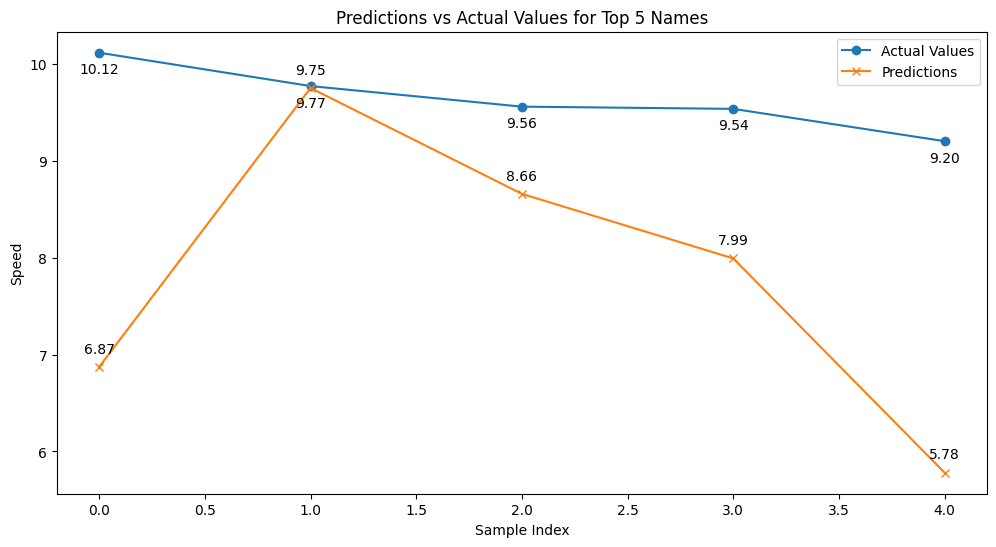

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Assuming 'df' is the original DataFrame that contains the rankings and names
# Ensure that time columns are converted to seconds since midnight
def time_to_seconds(dt):
    if pd.isnull(dt):
        return np.nan  # Handle invalid datetime entries
    return dt.hour * 3600 + dt.minute * 60 + dt.second

def time_to_seconds2(dt):
    if pd.isnull(dt):
        return np.nan  # Handle invalid datetime entries
    return dt.minute * 60 + dt.second

# Convert time columns to seconds since midnight
df['Albishorn (18.5k)'] = pd.to_datetime(df['Albishorn (18.5k)'], format='%H:%M:%S', errors='coerce').apply(time_to_seconds2)
df['Etzel (50k)'] = pd.to_datetime(df['Etzel (50k)'], format='%H:%M:%S', errors='coerce').apply(time_to_seconds)
df['Boulder (62k)'] = pd.to_datetime(df['Boulder (62k)'], format='%H:%M:%S', errors='coerce').apply(time_to_seconds)
df['Pfanni (82k)'] = pd.to_datetime(df['Pfanni (82k)'], format='%H:%M:%S', errors='coerce').apply(time_to_seconds)
filtered_df = df[df['STATION'] == 'ZIEL']

# Drop duplicate names
filtered_df = filtered_df.drop_duplicates(subset='NAME')

# Remove rows with missing 'SPEED' values
filtered_df = filtered_df.dropna(subset=['SPEED'])

# Get the top 5 names based on the ranking
top_5 = filtered_df.nsmallest(5, 'Rang (Overall)')

# Extract the 'NAME' and 'SPEED' columns
top_5_names = top_5['NAME'].values
top_5_speeds = top_5['SPEED'].values

# Define y_test_predictions (replace this with actual predicted values if available)
# For demonstration, we'll assume y_test_predictions are some calculated or predefined values
y_test_predictions = np.random.uniform(5, 10, size=5)  # Example predicted values

# Convert to series for plotting
y_test_top_5 = pd.Series(top_5_speeds, index=top_5_names)  # Actual values
y_test_top_5_predictions = pd.Series(y_test_predictions, index=top_5_names)  # Predicted values

# Print the predicted values
print("Predicted values for the top 5 names:")
print(y_test_top_5_predictions)

# Plot the predictions and actual values for the top 5 names
plt.figure(figsize=(12, 6))
plt.plot(y_test_top_5.values, label='Actual Values', marker='o')
plt.plot(y_test_top_5_predictions.values, label='Predictions', marker='x')

# Annotate the plot with actual speed values
for i, txt in enumerate(y_test_top_5.values):
    plt.annotate(f'{txt:.2f}', (i, y_test_top_5.values[i]), textcoords="offset points", xytext=(0,-15), ha='center', color='black')

# Annotate the plot with predicted values
for i, txt in enumerate(y_test_top_5_predictions.values):
    plt.annotate(f'{txt:.2f}', (i, y_test_top_5_predictions.values[i]), textcoords="offset points", xytext=(0,10), ha='center', color='black')

plt.title('Predictions vs Actual Values for Top 5 Names')
plt.xlabel('Sample Index')
plt.ylabel('Speed')
plt.legend()
plt.show()


In [9]:
# Predict the values for the test set
y_test_predictions = model.predict(X_test)

# Print the predictions and the actual values
print("Test Set Predictions:", y_test_predictions)
print("Actual Values:", y_test)


1/1 [==============================] - 0s 41ms/step
Test Set Predictions: [[ 8.701356 ]
 [ 8.798812 ]
 [10.265425 ]
 [ 6.917001 ]
 [ 7.542699 ]
 [ 6.2228217]
 [ 8.051534 ]
 [10.655454 ]
 [ 8.972022 ]
 [12.026749 ]
 [ 6.995672 ]
 [ 7.0761733]
 [ 8.772597 ]
 [ 7.6707277]
 [ 7.726946 ]
 [ 6.280099 ]
 [ 9.459541 ]
 [ 7.0041018]
 [ 8.203134 ]
 [ 7.873128 ]
 [ 8.152934 ]
 [ 6.3777027]
 [ 8.874881 ]
 [ 8.090531 ]
 [ 8.67638  ]]
Actual Values: [[ 8.90850722]
 [ 8.50031908]
 [ 8.58358036]
 [ 7.92574081]
 [ 7.44724866]
 [ 7.57765389]
 [ 8.15177479]
 [ 5.92983034]
 [ 6.09013398]
 [ 9.66337783]
 [ 8.17178917]
 [ 6.79706971]
 [ 8.49273145]
 [ 6.6518847 ]
 [ 8.15069734]
 [ 7.57257047]
 [ 9.437438  ]
 [ 7.23284101]
 [ 8.96816302]
 [ 6.50759219]
 [ 7.87780647]
 [ 7.91537913]
 [10.09090909]
 [ 8.81535407]
 [ 8.1422174 ]]


In [10]:
# Filter the DataFrame for station 'ZIEL'
filtered_df = df[df['STATION'] == 'ZIEL']

# Drop duplicate names
filtered_df = filtered_df.drop_duplicates(subset='NAME')

# Remove rows with missing 'SPEED' values
filtered_df = filtered_df.dropna(subset=['SPEED'])

# Get the top 3 names based on the ranking
top_3 = filtered_df.nsmallest(3, 'Rang (Overall)')

# Extract the 'NAME' and 'SPEED' columns
top_3_names = top_3['NAME'].values
top_3_speeds = top_3['SPEED'].values

# Print the names and speeds
for name, speed in zip(top_3_names, top_3_speeds):
    print(f"Name: {name}, Speed: {speed}")

Name: Henrik Westerlin, Speed: 10.117721921730825
Name: Pascal Rüeger, Speed: 9.773338455628126
Name: Matthias Dippacher, Speed: 9.560794728534553


In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_test_predictions)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_test_predictions)
print("Mean Absolute Error:", mae)


Mean Squared Error: 2.148604438424336
Mean Absolute Error: 1.0342804896537086


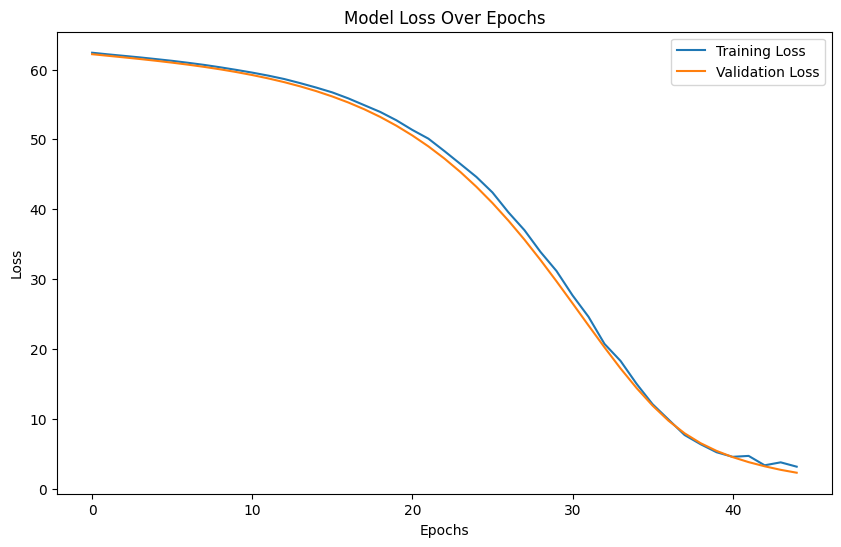

In [12]:
# Combine the history from all folds
combined_train_loss = []
combined_val_loss = []

for hist in history_list:
    combined_train_loss.append(hist.history['loss'])
    combined_val_loss.append(hist.history['val_loss'])

# Compute average loss per epoch across all folds
avg_train_loss = np.mean(combined_train_loss, axis=0)
avg_val_loss = np.mean(combined_val_loss, axis=0)

# Plot the average training and validation loss over epochs
plt.figure(figsize=(10, 6))
plt.plot(avg_train_loss, label='Training Loss')
plt.plot(avg_val_loss, label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

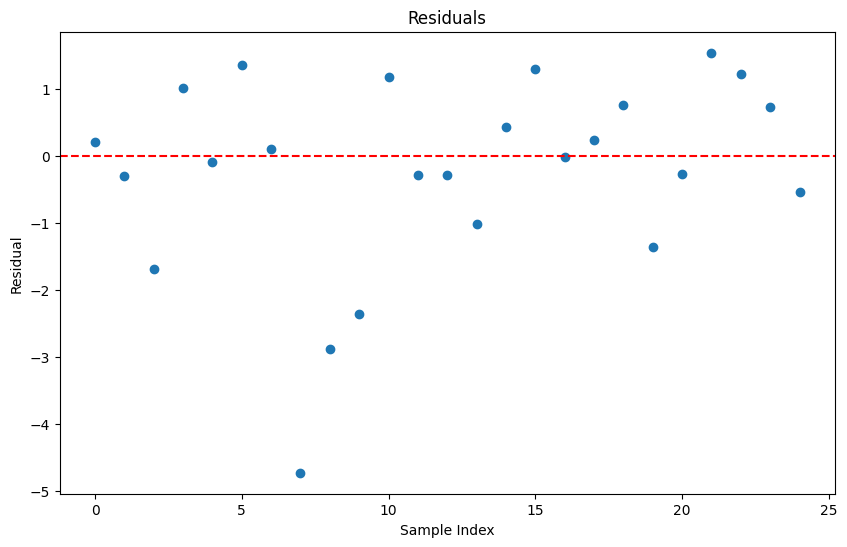

In [13]:
import matplotlib.pyplot as plt

# Residual plot
residuals = y_test - y_test_predictions

plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals)), residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals')
plt.xlabel('Sample Index')
plt.ylabel('Residual')
plt.show()